In [71]:
import requests
import config
from bs4 import BeautifulSoup as BS
import mysql.connector
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



In [29]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
#pip install sodapy

import pandas as pd
from sodapy import Socrata
import config_nyc_od

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
#client = Socrata("data.cityofnewyork.us", None)


In [30]:
# Example authenticated client (needed for non-public datasets):
client = Socrata('data.cityofnewyork.us',
                 config_nyc_od.app_tok,
                 username=config_nyc_od.app_username,
                 password=config_nyc_od.app_pw)

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
#results = client.get("tg4x-b46p", limit=2000)

# Convert to pandas DataFrame
#results_df = pd.DataFrame.from_records(results)

In [63]:
felony_df = pd.read_excel(r'felony_clean.xls')
felony_df['PCT'].fillna( method ='ffill', inplace = True)
felony_df = felony_df[felony_df['CRIME']=='TOTAL SEVEN MAJOR FELONY OFFENSES']
felony_df.head(10)

,PCT,CRIME,2000,2001,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
7,1.0,TOTAL SEVEN MAJOR FELONY OFFENSES,3438.0,3069.0,2715.0,2649.0,2383.0,2305.0,2013.0,1914.0,...,1578.0,1445.0,1402.0,1416.0,1416,1208,1446,1395,1337,1356
15,5.0,TOTAL SEVEN MAJOR FELONY OFFENSES,1780.0,1458.0,1309.0,1231.0,1170.0,1131.0,1040.0,1031.0,...,975.0,969.0,962.0,1001.0,980,870,917,899,889,897
23,6.0,TOTAL SEVEN MAJOR FELONY OFFENSES,2387.0,2141.0,2059.0,2068.0,2174.0,2055.0,1979.0,1837.0,...,1633.0,1530.0,1504.0,1574.0,1703,1575,1521,1388,1432,1517
31,7.0,TOTAL SEVEN MAJOR FELONY OFFENSES,990.0,892.0,908.0,864.0,857.0,804.0,864.0,856.0,...,702.0,702.0,704.0,762.0,711,732,781,823,865,919
39,9.0,TOTAL SEVEN MAJOR FELONY OFFENSES,2115.0,1672.0,1809.0,1801.0,1747.0,1664.0,1579.0,1519.0,...,1523.0,1387.0,1350.0,1419.0,1424,1331,1337,1463,1300,1302
47,10.0,TOTAL SEVEN MAJOR FELONY OFFENSES,1398.0,877.0,831.0,1436.0,1466.0,1418.0,1469.0,1326.0,...,1133.0,1049.0,1037.0,1088.0,1123,1022,1061,1032,981,1046
55,13.0,TOTAL SEVEN MAJOR FELONY OFFENSES,3317.0,3054.0,3145.0,3031.0,3071.0,2812.0,2716.0,2540.0,...,2389.0,2136.0,2044.0,2022.0,2152,2061,2056,1879,1694,1954
63,14.0,TOTAL SEVEN MAJOR FELONY OFFENSES,6857.0,6088.0,5265.0,5105.0,4730.0,4423.0,4173.0,3971.0,...,3330.0,3069.0,2896.0,2896.0,2863,2744,2809,2797,2645,2606
71,17.0,TOTAL SEVEN MAJOR FELONY OFFENSES,2028.0,1990.0,1801.0,1796.0,1667.0,1397.0,1391.0,1277.0,...,1018.0,990.0,937.0,1020.0,1024,909,986,1000,1023,1021
79,18.0,TOTAL SEVEN MAJOR FELONY OFFENSES,5607.0,5263.0,4508.0,4144.0,3992.0,3652.0,2945.0,2761.0,...,2479.0,2331.0,2228.0,2313.0,2271,2394,2361,2467,2411,2425


In [64]:
other_felony_df = pd.read_excel(r'other_felony.xls')
other_felony_df['PCT'].fillna( method ='ffill', inplace = True)
other_felony_df = other_felony_df[other_felony_df['CRIME']=='TOTAL NON-SEVEN MAJOR FELONY OFFENSES']
other_felony_df.head()

,PCT,CRIME,2000,2001,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
8,1.0,TOTAL NON-SEVEN MAJOR FELONY OFFENSES,431.0,555.0,463.0,385.0,474.0,354.0,312.0,353.0,...,408.0,358.0,378.0,383.0,310,353,342,341,363,397
17,5.0,TOTAL NON-SEVEN MAJOR FELONY OFFENSES,602.0,648.0,584.0,531.0,579.0,634.0,741.0,715.0,...,582.0,556.0,487.0,467.0,414,369,489,691,593,620
26,6.0,TOTAL NON-SEVEN MAJOR FELONY OFFENSES,788.0,687.0,817.0,615.0,805.0,632.0,676.0,714.0,...,527.0,559.0,426.0,499.0,565,450,507,478,512,473
35,7.0,TOTAL NON-SEVEN MAJOR FELONY OFFENSES,440.0,520.0,437.0,481.0,581.0,571.0,564.0,700.0,...,552.0,426.0,435.0,458.0,564,517,482,426,420,433
44,9.0,TOTAL NON-SEVEN MAJOR FELONY OFFENSES,959.0,796.0,712.0,696.0,914.0,907.0,826.0,754.0,...,770.0,715.0,617.0,711.0,750,671,615,613,586,443


In [65]:
misdemeanor_df = pd.read_excel(r'misdemeanor_pct.xls')
misdemeanor_df['PCT'].fillna( method = 'ffill', inplace = True)
misdemeanor_df = misdemeanor_df[misdemeanor_df['CRIME']=='TOTAL MISDEMEANOR OFFENSES']
misdemeanor_df.head(20)

,PCT,CRIME,2000,2001,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
17,1.0,TOTAL MISDEMEANOR OFFENSES,5609.0,5007.0,4190.0,4753.0,4289.0,3877.0,3669.0,4157.0,...,4196.0,4125.0,4499.0,4693.0,4503,4043,3881,4364,4040,4504
35,5.0,TOTAL MISDEMEANOR OFFENSES,2855.0,2859.0,2504.0,2608.0,2655.0,2597.0,2645.0,2849.0,...,3236.0,3697.0,3320.0,3375.0,3437,3401,3339,3140,3042,2526
53,6.0,TOTAL MISDEMEANOR OFFENSES,6847.0,6513.0,5946.0,4452.0,4117.0,3707.0,4013.0,4605.0,...,4271.0,4365.0,4285.0,4066.0,4035,3718,3397,2933,3256,2860
71,7.0,TOTAL MISDEMEANOR OFFENSES,2419.0,2297.0,2312.0,2730.0,2698.0,2895.0,2590.0,3057.0,...,3146.0,3438.0,3211.0,3270.0,2970,2741,2932,3014,3009,2440
89,9.0,TOTAL MISDEMEANOR OFFENSES,5319.0,4492.0,4445.0,4803.0,4652.0,4239.0,4026.0,4228.0,...,4410.0,4644.0,4581.0,4587.0,4290,3963,3965,3793,3433,3074
107,10.0,TOTAL MISDEMEANOR OFFENSES,3511.0,3052.0,3058.0,3175.0,2809.0,3092.0,3150.0,2690.0,...,2633.0,2670.0,2905.0,2946.0,3077,2677,2516,2648,2327,2233
125,13.0,TOTAL MISDEMEANOR OFFENSES,6056.0,5617.0,5208.0,5063.0,4985.0,4521.0,4128.0,4840.0,...,4892.0,5230.0,5846.0,5785.0,5801,5282,5409,5052,5099,4551
143,14.0,TOTAL MISDEMEANOR OFFENSES,12721.0,11469.0,11416.0,10361.0,9840.0,8615.0,9743.0,10784.0,...,10639.0,10614.0,10036.0,9856.0,10483,10621,9554,9482,9137,7681
161,17.0,TOTAL MISDEMEANOR OFFENSES,2821.0,2822.0,2323.0,2168.0,2059.0,2030.0,1892.0,2018.0,...,1846.0,1794.0,1891.0,2044.0,2075,1862,1641,1947,2217,2215
179,18.0,TOTAL MISDEMEANOR OFFENSES,7231.0,6927.0,5950.0,4912.0,4794.0,4396.0,4587.0,4637.0,...,4872.0,5117.0,5009.0,4987.0,5005,5163,4891,5182,5348,4622


In [66]:
violation_df = pd.read_excel(r'violation_pct.xls')
violation_df['PCT'].fillna( method = 'ffill', inplace = True)
violation_df = violation_df[violation_df['CRIME']=='TOTAL VIOLATION OFFENSES']
violation_df.head(20)

,PCT,CRIME,2000,2001,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
2,1.0,TOTAL VIOLATION OFFENSES,1062.0,908.0,865.0,819.0,786.0,614.0,592.0,692.0,...,447.0,438.0,647.0,749.0,498,608,595,724,834,845
5,5.0,TOTAL VIOLATION OFFENSES,571.0,563.0,598.0,507.0,396.0,468.0,394.0,427.0,...,455.0,431.0,426.0,468.0,362,427,421,495,473,483
8,6.0,TOTAL VIOLATION OFFENSES,846.0,814.0,712.0,596.0,511.0,546.0,536.0,455.0,...,435.0,502.0,550.0,474.0,433,458,429,458,417,433
11,7.0,TOTAL VIOLATION OFFENSES,594.0,547.0,534.0,500.0,440.0,517.0,490.0,480.0,...,465.0,454.0,416.0,487.0,438,506,586,614,497,555
14,9.0,TOTAL VIOLATION OFFENSES,1032.0,997.0,971.0,864.0,809.0,826.0,760.0,640.0,...,695.0,651.0,662.0,678.0,605,584,563,584,540,598
17,10.0,TOTAL VIOLATION OFFENSES,619.0,584.0,603.0,594.0,704.0,586.0,524.0,477.0,...,466.0,421.0,395.0,404.0,437,420,390,440,460,593
20,13.0,TOTAL VIOLATION OFFENSES,1180.0,1036.0,1092.0,876.0,1063.0,982.0,882.0,911.0,...,717.0,666.0,683.0,722.0,732,692,765,657,692,767
23,14.0,TOTAL VIOLATION OFFENSES,1702.0,1560.0,1518.0,1297.0,1387.0,1046.0,1114.0,1093.0,...,1121.0,885.0,755.0,818.0,695,855,741,729,764,822
26,17.0,TOTAL VIOLATION OFFENSES,787.0,838.0,695.0,650.0,562.0,495.0,537.0,501.0,...,413.0,393.0,304.0,322.0,320,360,430,439,552,497
29,18.0,TOTAL VIOLATION OFFENSES,1618.0,1366.0,1165.0,1281.0,994.0,852.0,837.0,910.0,...,882.0,898.0,845.0,900.0,1004,1104,1059,1063,1054,1258


In [57]:
# felony_df = felony_df.set_index('PCT')
# other_felony_df = other_felony_df.set_index('PCT')
# misdemeanor_df = misdemeanor_df.set_index('PCT')
# violation_df = violation_df.set_index('PCT')

In [67]:
felony_df

,PCT,CRIME,2000,2001,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
7,1.0,TOTAL SEVEN MAJOR FELONY OFFENSES,3438.0,3069.0,2715.0,2649.0,2383.0,2305.0,2013.0,1914.0,...,1578.0,1445.0,1402.0,1416.0,1416,1208,1446,1395,1337,1356
15,5.0,TOTAL SEVEN MAJOR FELONY OFFENSES,1780.0,1458.0,1309.0,1231.0,1170.0,1131.0,1040.0,1031.0,...,975.0,969.0,962.0,1001.0,980,870,917,899,889,897
23,6.0,TOTAL SEVEN MAJOR FELONY OFFENSES,2387.0,2141.0,2059.0,2068.0,2174.0,2055.0,1979.0,1837.0,...,1633.0,1530.0,1504.0,1574.0,1703,1575,1521,1388,1432,1517
31,7.0,TOTAL SEVEN MAJOR FELONY OFFENSES,990.0,892.0,908.0,864.0,857.0,804.0,864.0,856.0,...,702.0,702.0,704.0,762.0,711,732,781,823,865,919
39,9.0,TOTAL SEVEN MAJOR FELONY OFFENSES,2115.0,1672.0,1809.0,1801.0,1747.0,1664.0,1579.0,1519.0,...,1523.0,1387.0,1350.0,1419.0,1424,1331,1337,1463,1300,1302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,115.0,TOTAL SEVEN MAJOR FELONY OFFENSES,3021.0,2816.0,2830.0,2367.0,2339.0,2253.0,2169.0,1945.0,...,1774.0,1760.0,1839.0,1769.0,1760,1888,1795,1885,1818,1657
591,120.0,TOTAL SEVEN MAJOR FELONY OFFENSES,2347.0,2048.0,1968.0,1738.0,1785.0,1812.0,1722.0,1706.0,...,1505.0,1547.0,1630.0,1873.0,1601,1165,1147,1131,1061,982
599,121.0,TOTAL SEVEN MAJOR FELONY OFFENSES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,548,979,1069,935,860,792
607,122.0,TOTAL SEVEN MAJOR FELONY OFFENSES,1692.0,1434.0,1354.0,1252.0,1356.0,1284.0,1203.0,1259.0,...,1079.0,1008.0,1007.0,1108.0,879,720,671,736,590,615


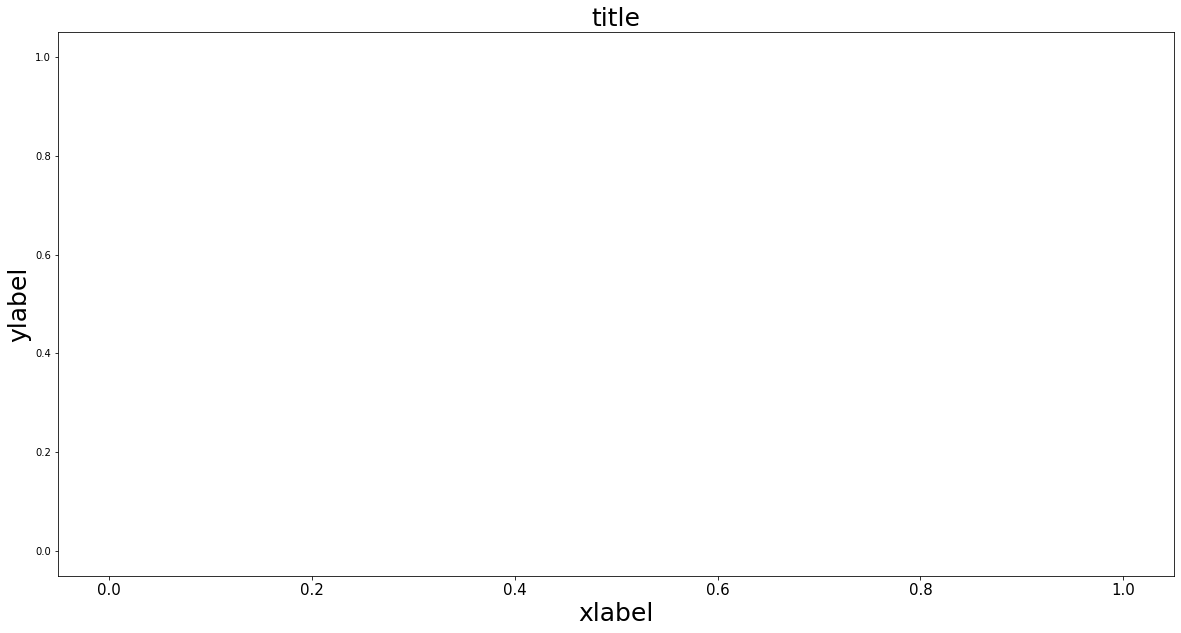

In [74]:
x = felony_df['PCT']
y = felony_df.iloc[3]

fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(x, y, s=200)
#ax.legend(prop={'size': 15})
plt.title('title', fontsize=25)
plt.xticks(size=15)
plt.xlabel('xlabel', size=25)
plt.ylabel('ylabel', size=25)
plt.show()

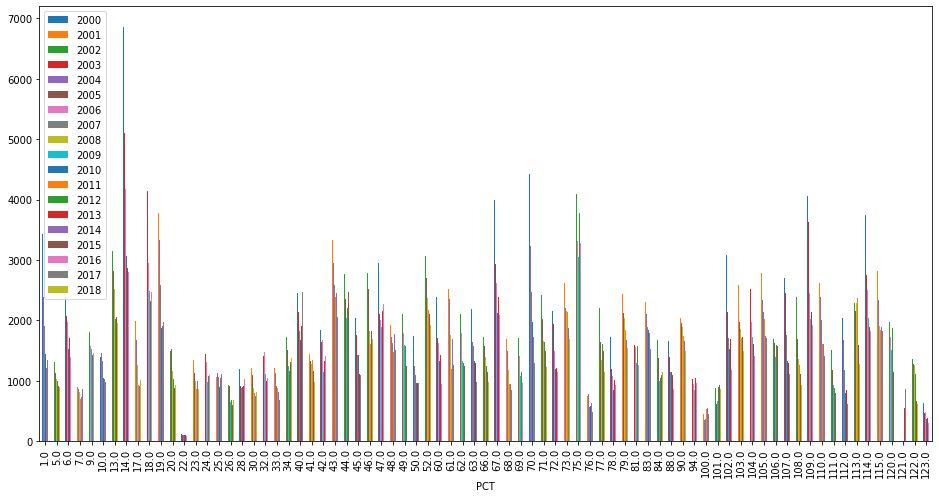

In [80]:
#fig, ax = plt.subplots(figsize=(20, 10))
felony_df2 = felony_df.set_index('PCT')
felony_df2.plot.bar(figsize=(16,8))
#plt.show()